## 5. FASTA alignment

We use ANARCI tool to generate CSV files containing numbered FASTA sequences using defined numbering scheme.

Then the metadata are extracted, columns sorted and some minor post-processing steps performed.

---

## Run ANARCI

Run all the commands below.

**I advise you to run them in a separate terminal window.
They might take too much time to run if run them right in this notebook.**

In any case, running them will probable take up a few minutes.

In [1]:
import sys; sys.path.append('../..')
import bin.params as p

# FASTA_UNALIGNED_DIR = f"{p.DATA_DIR}/sequences/incremental-converted" # old
FASTA_UNALIGNED_DIR = f"{p.DATA_DIR}/sequences/incremental-convertedJuly2024" #july2024
# FASTA_ALIGNED_DIR = f"{p.DATA_DIR}../../csv/fasta_aligned" # old
FASTA_ALIGNED_DIR = f"{p.DATA_DIR}/csv/fasta_alignedJuly2024" # july2024

# IB july2024
FASTA_UNALIGNED_DIR = f'{p.DATA_DIR}/sequences/incremental-convertedIB2July2024'
FASTA_ALIGNED_DIR = f"{p.DATA_DIR}/csv/fasta_alignedIB2July2024"

# FIXBUG
FASTA_UNALIGNED_DIR = f'{p.DATA_DIR}/sequences/incremental-converted-fixbug'
FASTA_ALIGNED_DIR = f"{p.DATA_DIR}/csv/fasta_aligned_fixbug"

FASTA_UNALIGNED_DIR, FASTA_ALIGNED_DIR

('../../data/sequences/incremental-converted-fixbug',
 '../../data/csv/fasta_aligned_fixbug')

In [2]:
command = f'mkdir -p {FASTA_ALIGNED_DIR}'
! $command

**Run the following cell, copy the output and run that output in terminal:**

In [3]:
command = f"""
## NOTE: commands assume that your current working directory is notebooks/processing

# ONLY IN CASE YOU HAVE NOT DONE SO YET, activate virtual environment 
# conda activate proto-moto

# go to directory containing unaligned FASTA sequences
cd {FASTA_UNALIGNED_DIR}

# merge them all into one file called all.fasta
cat *.fasta > all.fasta

# Let the anarci generate two aligned FASTA .csv files
# one called fasta_<SCHEME>_H.csv and one fasta_<SCHEME>_KL.csv
# This command will take about 5 minutes to run 
mkdir -p ../{FASTA_ALIGNED_DIR}
anarci -i all.fasta -o ../{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME} --csv --scheme={p.FINAL_NUMBERING_SCHEME}

# cleanup
# remove temporarily created all.fasta
rm -rf all.fasta
# rename KL to L as that is more convenient
mv ../{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_KL.csv ../{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_L.csv
"""

print(command)


## NOTE: commands assume that your current working directory is notebooks/processing

# ONLY IN CASE YOU HAVE NOT DONE SO YET, activate virtual environment 
# conda activate proto-moto

# go to directory containing unaligned FASTA sequences
cd ../../data/sequences/incremental-converted-fixbug

# merge them all into one file called all.fasta
cat *.fasta > all.fasta

# Let the anarci generate two aligned FASTA .csv files
# one called fasta_<SCHEME>_H.csv and one fasta_<SCHEME>_KL.csv
# This command will take about 5 minutes to run 
mkdir -p ../../../data/csv/fasta_aligned_fixbug
anarci -i all.fasta -o ../../../data/csv/fasta_aligned_fixbug/fasta_aho --csv --scheme=aho

# cleanup
# remove temporarily created all.fasta
rm -rf all.fasta
# rename KL to L as that is more convenient
mv ../../../data/csv/fasta_aligned_fixbug/fasta_aho_KL.csv ../../../data/csv/fasta_aligned_fixbug/fasta_aho_L.csv



**Two `.csv` files containing aligned (renumbered) sequences were created in `data/csv/fasta_aligned` directory - one for L chains and another one for H chains. Check that you see the two .csv files in the following command's output:**

In [4]:
command = f"ls -l {FASTA_ALIGNED_DIR}"
! $command

total 6032
-rw-r--r--  1 rbeno  staff  1608241 Jul 24 20:08 fasta_aho_H.csv
-rw-r--r--  1 rbeno  staff  1474834 Jul 24 20:08 fasta_aho_L.csv


---

## Setup

In [7]:
import collections
import sys; sys.path.append('../..')
import pandas as pd
import seaborn as sns

import bin.params as p
import bin.utils as u

In [118]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(12,6)})

In [27]:
METADATA_DIR_PATH = f'{p.DATA_DIR}/csv/metadataJuly2024' # july2024
# METADATA_DIR_PATH = f'{p.DATA_DIR}/csv/metadata' # old
FASTA_ALIGNED_CLEANED_DIR_PATH = f'{p.DATA_DIR}/csv/fasta_aligned_cleanedJuly2024' # july2024
# FASTA_ALIGNED_CLEANED_DIR_PATH = f'{p.DATA_DIR}/csv/fasta_aligned_cleaned' # old
UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH = f'{p.DATA_DIR}/csv/uneven_fasta_sasa_lengthsJuly2024' # july2024
# UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH = f'{p.DATA_DIR}/csv/uneven_fasta_sasa_lengths' # old
FASTA_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/fasta_unalignedJuly2024' #july2024
# FASTA_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/fasta_unaligned'# old
SASA_RELATIVE_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/sasa_relative_unalignedJuly2024' # july2024
# SASA_RELATIVE_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/sasa_relative_unaligned' # old
FASTA_SASA_LENGTH_DIFFS_HISTOGRAM_PATH = f'{p.DATA_DIR}/png/fasta_sasa_length_diffs_histJuly2024.png' # july2024
# FASTA_SASA_LENGTH_DIFFS_HISTOGRAM_PATH = f'{p.DATA_DIR}/png/fasta_sasa_length_diffs_hist.png' # old

METADATA_DIR_PATH = f'{p.DATA_DIR}/csv/metadataIB2July2024'
FASTA_ALIGNED_CLEANED_DIR_PATH = f'{p.DATA_DIR}/csv/fasta_aligned_cleanedIB2July2024'
UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH = f'{p.DATA_DIR}/csv/uneven_fasta_sasa_lengthsIB2July2024'
FASTA_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/fasta_unalignedIB2July2024'
SASA_RELATIVE_UNALIGNED_CSV_DIR = f'{p.DATA_DIR}/csv/sasa_relative_unalignedIBJuly2024'
FASTA_SASA_LENGTH_DIFFS_HISTOGRAM_PATH = f'{p.DATA_DIR}/png/fasta_sasa_length_diffs_histIB2July2024.png' 

#fixbug
FASTA_ALIGNED_CLEANED_DIR_PATH = f'{p.DATA_DIR}/csv/fasta_aligned_cleaned_fixbug'

(METADATA_DIR_PATH, FASTA_ALIGNED_CLEANED_DIR_PATH, UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH, 
 FASTA_UNALIGNED_CSV_DIR, SASA_RELATIVE_UNALIGNED_CSV_DIR, 
 FASTA_SASA_LENGTH_DIFFS_HISTOGRAM_PATH)

('../../data/csv/metadataIB2July2024',
 '../../data/csv/fasta_aligned_cleaned_fixbug',
 '../../data/csv/uneven_fasta_sasa_lengthsIB2July2024',
 '../../data/csv/fasta_unalignedIB2July2024',
 '../../data/csv/sasa_relative_unalignedIBJuly2024',
 '../../data/png/fasta_sasa_length_diffs_histIB2July2024.png')

In [28]:
command = f'mkdir -p {METADATA_DIR_PATH} {FASTA_ALIGNED_CLEANED_DIR_PATH} {UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH}'
! $command

## Create merged `fasta_aligned_all.csv` dataset

**Let us create merged file that contains all the aligned sequences:**

(note: this dataframe will be transformed later on)

In [10]:
fasta_L_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_L.csv', index_col=0)
fasta_H_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_H.csv', index_col=0)
print('fasta aligned dir', FASTA_ALIGNED_DIR)
fasta_all_df = pd.concat([fasta_L_df, fasta_H_df]).sort_index()
fasta_all_df.to_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_all.csv')

fasta aligned dir ../../data/csv/fasta_aligned_fixbug


In [11]:
def nondash_counts_columns(df):
    all_counts = df.count(axis=0)
    gap_counts = df.apply(lambda x: x.str.contains('-').sum(), axis=0)
    return all_counts - gap_counts

fasta_L_df

,domain_no,hmm_species,chain_type,e-value,score,seqstart_index,seqend_index,identity_species,v_gene,v_identity,...,140,141,142,143,144,145,146,147,148,149
Id,,,,,,,,,,,,,,,,,,,,,
12E8:L,0,mouse,K,3.400000e-53,170.2,0,107,NaN,NaN,0.0,...,G,A,G,T,K,L,E,L,K,R
15C8:L,0,mouse,K,4.700000e-56,179.5,0,108,NaN,NaN,0.0,...,G,G,G,T,K,L,E,I,K,R
1A0Q:L,0,rat,K,3.900000e-47,150.6,0,105,NaN,NaN,0.0,...,G,G,G,T,K,L,E,I,K,R
1A14:L,0,mouse,K,8.100000e-48,152.8,0,101,NaN,NaN,0.0,...,G,G,G,T,-,-,-,-,-,-
1A2Y:L,0,mouse,K,6.200000e-52,166.1,0,106,NaN,NaN,0.0,...,G,G,G,T,K,L,E,I,K,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8Y6A:L,0,human,K,8.200000e-56,178.5,0,107,NaN,NaN,0.0,...,G,G,G,T,K,V,E,I,K,R
8Y6H:L,0,rhesus,K,1.600000e-54,174.6,0,110,NaN,NaN,0.0,...,G,G,G,T,K,L,D,I,K,R
8Y6I:L,0,rhesus,K,8.600000e-58,185.1,0,113,NaN,NaN,0.0,...,G,G,G,T,K,L,D,I,K,R


In [12]:
fasta_all_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_all.csv', index_col=0)
print('fasta_all_df.shape', fasta_all_df.shape)
fasta_all_df.head(n=1)

fasta_all_df.shape (8284, 183)


,domain_no,hmm_species,chain_type,e-value,score,seqstart_index,seqend_index,identity_species,v_gene,v_identity,...,85D,85E,85F,85G,85H,123A,123B,123C,123D,143A
Id,,,,,,,,,,,,,,,,,,,,,
12E8:H,0,mouse,H,1.100000e-53,171.7,0,119,NaN,NaN,0.0,...,-,-,-,-,-,-,-,-,-,-


---

## Load the data

In [16]:
sasa_unaligned_df = pd.read_csv(f'{SASA_RELATIVE_UNALIGNED_CSV_DIR}/sasa_all.csv', index_col=0)
fasta_unaligned_df = pd.read_csv(f'{FASTA_UNALIGNED_CSV_DIR}/fasta_all.csv', index_col=0)
fasta_unaligned_L_df = pd.read_csv(f'{FASTA_UNALIGNED_CSV_DIR}/fasta_L.csv', index_col=0)
fasta_unaligned_H_df = pd.read_csv(f'{FASTA_UNALIGNED_CSV_DIR}/fasta_H.csv', index_col=0)
fasta_aligned_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_all.csv', index_col=0)
fasta_aligned_L_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_L.csv', index_col=0)
fasta_aligned_H_df = pd.read_csv(f'{FASTA_ALIGNED_DIR}/fasta_{p.FINAL_NUMBERING_SCHEME}_H.csv', index_col=0)

print(SASA_RELATIVE_UNALIGNED_CSV_DIR, FASTA_UNALIGNED_CSV_DIR, FASTA_ALIGNED_DIR)
print(sasa_unaligned_df.shape, fasta_unaligned_df.shape, fasta_unaligned_L_df.shape, 
      fasta_unaligned_H_df.shape, fasta_aligned_df.shape, fasta_aligned_L_df.shape, fasta_aligned_H_df.shape)

../../data/csv/sasa_relative_unalignedIBJuly2024 ../../data/csv/fasta_unalignedIB2July2024 ../../data/csv/fasta_aligned_fixbug
(1760, 134) (1758, 156) (879, 156) (879, 156) (8284, 183) (4142, 165) (4142, 181)


## Extract metadata generated by ANARCI

Right now, the metadata are stored in dataframes generated from ANARCI renumbering - 
`fasta_aligned_L_df` and `fasta_aligned_H_df`.

**1. Compute `unaligned_len`, this is the sequence length **before** ANARCI renumbering took place. May be used in further analyses.**

In [124]:
unaligned_lengths = pd.DataFrame({'unaligned_len': u.nondash_counts(fasta_unaligned_df)})
print('unaligned_lengths shape:', unaligned_lengths.shape)
unaligned_lengths.head(n=1)

unaligned_lengths shape: (1758, 1)


,unaligned_len
7DF1:H,147


**2. Select metadata columns in `fasta_aligned` dataframe and copy them to separate `metadata` dataframe, appending previously computed `unaligned_length` data there as well:**

In [17]:
metadata_columns = ['domain_no', 'hmm_species', 'chain_type', 'e-value', 'score', 
                'seqstart_index', 'seqend_index', 'identity_species', 'v_gene', 
                'v_identity', 'j_gene', 'j_identity']

In [18]:
# sanity check
for metadata_col in metadata_columns:
    assert metadata_col in fasta_aligned_df.columns
    assert metadata_col in fasta_aligned_L_df.columns
    assert metadata_col in fasta_aligned_H_df.columns

In [19]:
metadata_df = fasta_aligned_df[metadata_columns]
metadata_df.index = fasta_aligned_df.index
metadata_df = pd.concat([metadata_df, unaligned_lengths], axis=1)

NameError: name 'unaligned_lengths' is not defined

In [128]:
metadata_df.head(n=1)

,domain_no,hmm_species,chain_type,e-value,score,seqstart_index,seqend_index,identity_species,v_gene,v_identity,j_gene,j_identity,unaligned_len
7DF1:H,0,human,H,3.500000e-46,147.7,0,146,NaN,NaN,0.0,NaN,0.0,147


**3. Store metadata to the `.csv` files:**

In [129]:
metadata_df.to_csv(f'{METADATA_DIR_PATH}/metadata_all.csv')
metadata_L_df = u.select_only_chain_sequences(metadata_df, 'L')
metadata_L_df.to_csv(f'{METADATA_DIR_PATH}/metadata_L.csv')
metadata_H_df = u.select_only_chain_sequences(metadata_df, 'H')
metadata_H_df.to_csv(f'{METADATA_DIR_PATH}/metadata_H.csv')
print('metadata_df.shape', metadata_df.shape, 'metadata_L_df.shape', metadata_L_df.shape, 'metadata_H_df.shape', metadata_H_df.shape)

metadata_df.shape (1758, 13) metadata_L_df.shape (879, 13) metadata_H_df.shape (879, 13)


## Cleanup the aligned dataframes

**1. Drop metadata columns:**

In [20]:
fac_df = fasta_aligned_df.drop(metadata_columns, axis=1)
fac_L_df = fasta_aligned_L_df.drop(metadata_columns, axis=1)
fac_H_df = fasta_aligned_H_df.drop(metadata_columns, axis=1)
print('fac_df.shape', fac_df.shape, 'fac_L_df.shape', fac_L_df.shape, 'fac_H_df.shape', fac_H_df.shape)

fac_df.shape (8284, 171) fac_L_df.shape (4142, 153) fac_H_df.shape (4142, 169)


**2. Reorder columns:**

Run the cell below to see columns of newly created dataframes:

In [24]:
print(list(fac_L_df.columns))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '46A', '47', '47A', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '85A', '85B', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']


The problem is that all columns that contain subpositions (e.g. `123B`, `85E` ...) are grouped at the end. That, of course, makes no sense. Let us fix it:

In [26]:
fac_df = u.sort_numbering_columns(fac_df)
fac_L_df = u.sort_numbering_columns(fac_L_df)
fac_H_df = u.sort_numbering_columns(fac_H_df)
print('after sort-renumbering-columns: fac_df.shape', fac_df.shape, 'fac_L_df.shape', fac_L_df.shape, 'fac_H_df.shape', fac_H_df.shape)

after sort-renumbering-columns: fac_df.shape (8284, 171) fac_L_df.shape (4142, 153) fac_H_df.shape (4142, 169)


In [25]:
print(list(fac_L_df.columns))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '46A', '47', '47A', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '85A', '85B', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']


**3. Transform merged aligned FASTA dataframe:**

We would like to merge `L` and `H` aligned fasta dataframes so they contain ANARCI positions from both chains.
This will be useful later on in ML experiments performed on all-chain-types data.

In [135]:
def prefix_df_columns(prefix: str, df: pd.DataFrame) -> pd.DataFrame:
    rename_dict = dict()
    for c in df.columns:
        rename_dict[c] = prefix + c
    return df.rename(columns=rename_dict)

In [136]:
fasta_aligned_prefH_df = prefix_df_columns('h_', fac_H_df)
fasta_aligned_prefL_df = prefix_df_columns('l_', fac_L_df)
fac_df = pd.concat([fasta_aligned_prefH_df, fasta_aligned_prefL_df], axis=1).fillna('-').sort_index()
print('fac_df.shape', fac_df.shape)
fac_df.head(n=1)

fac_df.shape (1758, 317)


,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,...,l_140,l_141,l_142,l_143,l_144,l_145,l_146,l_147,l_148,l_149
Id,,,,,,,,,,,,,,,,,,,,,
7DF1:H,-,V,Q,L,V,Q,S,X,G,A,...,-,-,-,-,-,-,-,-,-,-


In [137]:
fac_L_df.head(n=1)

,1,2,3,4,5,6,7,8,9,10,...,140,141,142,143,144,145,146,147,148,149
Id,,,,,,,,,,,,,,,,,,,,,
7DF1:L,D,I,V,M,T,Q,S,P,D,S,...,G,Q,G,T,R,L,E,I,-,-


In [138]:
fac_H_df.head(n=1)

,1,2,3,4,5,6,7,8,9,10,...,140,141,142,143,144,145,146,147,148,149
Id,,,,,,,,,,,,,,,,,,,,,
7DF1:H,-,V,Q,L,V,Q,S,X,G,A,...,G,Q,G,T,M,V,T,V,S,-


**4. Store cleaned dataframes:**

In [ ]:
fac_df.to_csv(f'{FASTA_ALIGNED_CLEANED_DIR_PATH}/fasta_{p.FINAL_NUMBERING_SCHEME}_all.csv')

In [29]:
fac_L_df.to_csv(f'{FASTA_ALIGNED_CLEANED_DIR_PATH}/fasta_{p.FINAL_NUMBERING_SCHEME}_L.csv')
fac_H_df.to_csv(f'{FASTA_ALIGNED_CLEANED_DIR_PATH}/fasta_{p.FINAL_NUMBERING_SCHEME}_H.csv')

## What chains have different SASA and FASTA length?

### Setup

In [140]:
def get_ulrs(fasta_df: pd.DataFrame, sasa_df: pd.DataFrame):
    fasta_lengths = u.nondash_counts(fasta_df)
    uneven_length_removals = collections.defaultdict(list)

    for sasa_index, sasa_row in sasa_df.iterrows():
        fasta_row = fasta_df.loc[sasa_index]    
        sasa_len = sasa_row.count()
        fasta_len = fasta_lengths[sasa_index]
        len_diff = abs(sasa_len - fasta_len)

        if len_diff > 0:
            uneven_length_removals['index'].append(sasa_index)
            uneven_length_removals['fasta_len'].append(fasta_len)
            uneven_length_removals['sasa_len'].append(sasa_len)
            uneven_length_removals['len_diff'].append(len_diff)   
    
    ulr_df = pd.DataFrame(uneven_length_removals)
    return ulr_df

def process_ulrs(fasta_df: pd.DataFrame, sasa_df: pd.DataFrame, fn_suffix: str, suffix: str = 'all'):
    ulrs_df = get_ulrs(fasta_df, sasa_df)
    filename = f'{UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH}/ufsl_{fn_suffix}.csv'
    print('saving ulrs to', filename)
    ulrs_df.to_csv(filename)
    ulrs_hist = ulrs_df['len_diff'].plot.hist()
    u.annotate_plot(plot=ulrs_hist,
        show_bar_values = True, bar_decimals = 0, 
        title=f'SASA vs. FASTA sequence length differences - {suffix}',
        xlabel='abs(SASAlength - FASTAlength)',
        ylabel='number of structures')
    ulrs_hist.figure.savefig(FASTA_SASA_LENGTH_DIFFS_HISTOGRAM_PATH.replace('.png', f'_{suffix}.png'))
    return ulrs_df

### UnalignedFASTA vs unalignedSASA (both chains)

saving ulrs to ../../data/csv/uneven_fasta_sasa_lengthsIB2July2024/ufsl_uu_all.csv


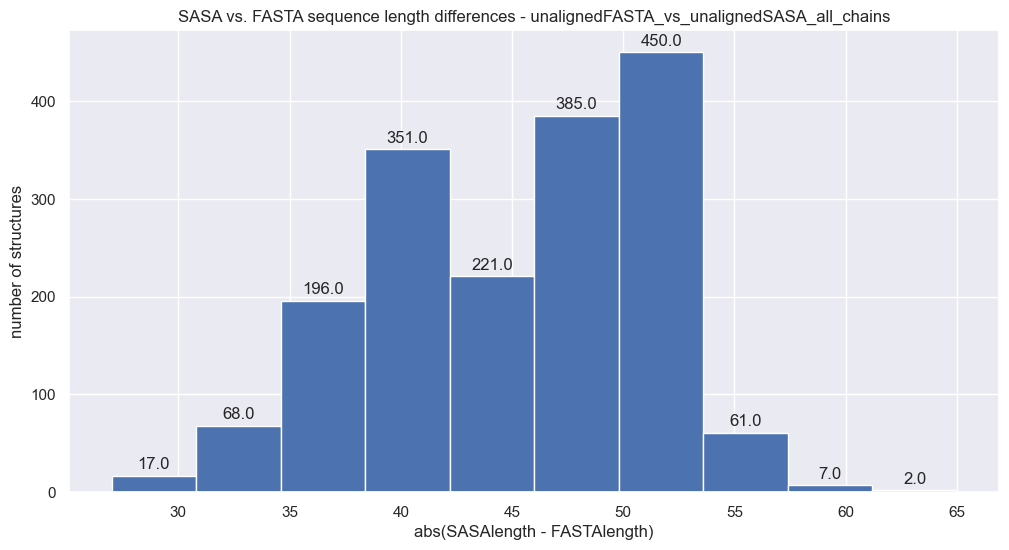

In [141]:
una_vs_una_df = process_ulrs(fasta_unaligned_df, sasa_unaligned_df, 'uu_all', 
             'unalignedFASTA_vs_unalignedSASA_all_chains')

In [142]:
print('avg len diff UNALIGNED FASTA VS UNALIGNED SASA', una_vs_una_df['len_diff'].mean())

avg len diff UNALIGNED FASTA VS UNALIGNED SASA 45.015358361774744


**We see there are only 11 sequences that have non-zero difference, and all of those have the difference very small - not greater than 2 residues!**

**Therefore, we will not discard any of the sequences because of non-match FASTA-SASA sequence length.**

In [143]:
uu_all_df = pd.read_csv(f'{UNEVEN_FASTA_SASA_LENGTHS_DIR_PATH}/ufsl_uu_all.csv', index_col=0)
uu_all_df

,index,fasta_len,sasa_len,len_diff
0,7DF1:H,147,110,37
1,7DF1:L,147,104,43
2,7E9O:H,149,111,38
3,7E9O:L,149,102,47
4,7FGJ:H,148,106,42
...,...,...,...,...
1753,8Y6I:L,149,103,46
1754,8YX1:H,148,106,42
1755,8YX1:L,149,98,51
1756,8YX9:H,149,99,50


### AlignedFASTA vs unalignedSASA (LIGHT chain)

saving ulrs to ../../data/csv/uneven_fasta_sasa_lengthsIB2July2024/ufsl_au_L.csv


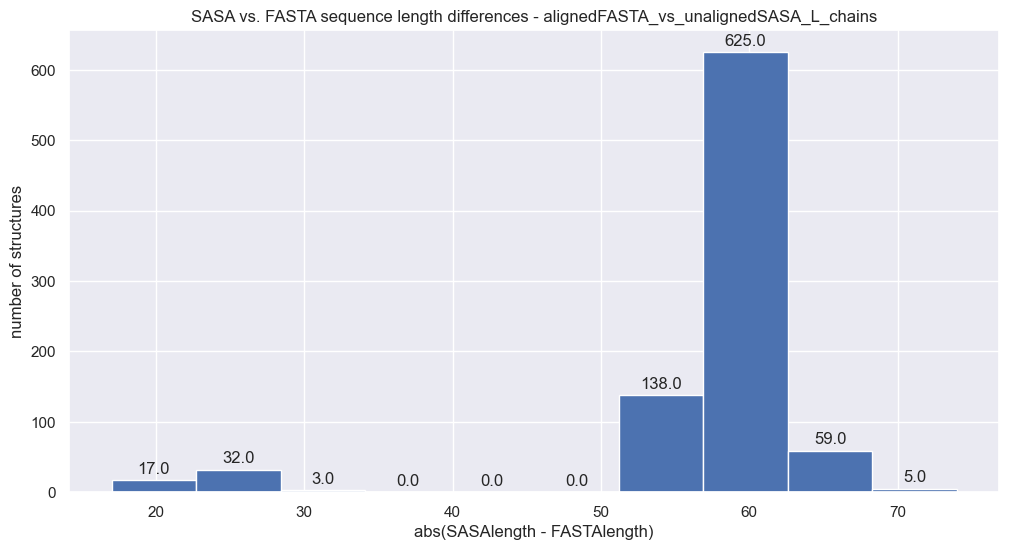

In [144]:
ufsl_au_L_df = process_ulrs(fasta_aligned_L_df, u.select_only_chain_sequences(sasa_unaligned_df, 'L'), 
             'au_L', 'alignedFASTA_vs_unalignedSASA_L_chains')

In [145]:
print('aligned FASTA vs unaligned SASA L chains len diff', ufsl_au_L_df['len_diff'].mean())

aligned FASTA vs unaligned SASA L chains len diff 56.70648464163823


### AlignedFASTA vs unalignedSASA (HEAVY chain)

saving ulrs to ../../data/csv/uneven_fasta_sasa_lengthsIB2July2024/ufsl_au_H.csv


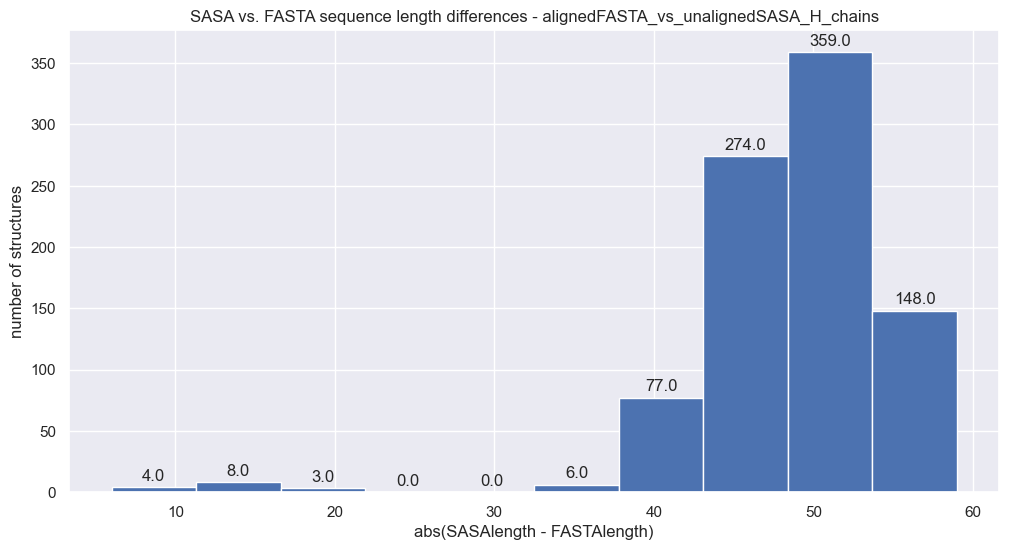

In [146]:
df = process_ulrs(fasta_aligned_H_df, u.select_only_chain_sequences(sasa_unaligned_df, 'H'), 
                  'au_H', 'alignedFASTA_vs_unalignedSASA_H_chains')

In [147]:
print('aligned FASTA vs unaligned SASA H chains len diff', df['len_diff'].mean())

aligned FASTA vs unaligned SASA H chains len diff 48.58361774744027


In [148]:
over_hundred_df = df[ df['len_diff'] > 100]
print('over_hundred_df.shape (len_diff > 100)', over_hundred_df.shape)

over_hundred_df.shape (len_diff > 100) (0, 4)


In [149]:
over_hundred_df

,index,fasta_len,sasa_len,len_diff
